In [40]:
pip install scikit-fuzzy


 nguy co tieu duong: 81.78673323823111


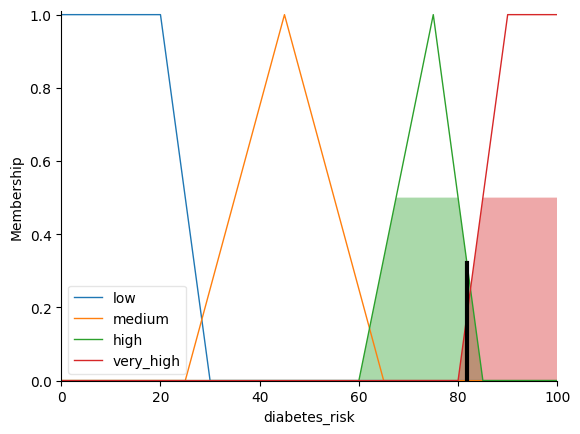

In [20]:
#2.2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


blood_sugar = ctrl.Antecedent(np.arange(0, 301, 1), 'blood_sugar')
bmi = ctrl.Antecedent(np.arange(10, 50, 0.1), 'bmi')
urination = ctrl.Antecedent(np.arange(0, 11, 1), 'urination')
fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'fatigue')

diabetes_risk = ctrl.Consequent(np.arange(0, 101, 1), 'diabetes_risk')

blood_sugar['low'] = fuzz.trapmf(blood_sugar.universe, [0, 0, 70, 90])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [80, 100, 120])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [110, 150, 190])
blood_sugar['very_high'] = fuzz.trapmf(blood_sugar.universe, [180, 200, 300, 300])

bmi['underweight'] = fuzz.trapmf(bmi.universe, [10, 10, 17, 19])
bmi['normal'] = fuzz.trimf(bmi.universe, [18, 21.5, 25])
bmi['overweight'] = fuzz.trimf(bmi.universe, [24, 27, 29.9])
bmi['obese'] = fuzz.trapmf(bmi.universe, [29, 30, 50, 50])

urination['rarely'] = fuzz.trapmf(urination.universe, [0, 0, 2, 4])
urination['sometimes'] = fuzz.trimf(urination.universe, [3, 5, 7])
urination['often'] = fuzz.trapmf(urination.universe, [6, 8, 10, 10])

fatigue['low'] = fuzz.trapmf(fatigue.universe, [0, 0, 2, 4])
fatigue['moderate'] = fuzz.trimf(fatigue.universe, [3, 5, 7])
fatigue['high'] = fuzz.trapmf(fatigue.universe, [6, 8, 10, 10])

diabetes_risk['low'] = fuzz.trapmf(diabetes_risk.universe, [0, 0, 20, 30])
diabetes_risk['medium'] = fuzz.trimf(diabetes_risk.universe, [25, 45, 65])
diabetes_risk['high'] = fuzz.trimf(diabetes_risk.universe, [60, 75, 85])
diabetes_risk['very_high'] = fuzz.trapmf(diabetes_risk.universe, [80, 90, 100, 100])

rule1 = ctrl.Rule(blood_sugar['very_high'] & urination['often'], diabetes_risk['very_high'])
rule2 = ctrl.Rule(blood_sugar['very_high'] & urination['sometimes'], diabetes_risk['high'])
rule3 = ctrl.Rule(blood_sugar['high'] & urination['often'], diabetes_risk['high'])
rule4 = ctrl.Rule(blood_sugar['normal'] & urination['rarely'], diabetes_risk['low'])

rule5 = ctrl.Rule(blood_sugar['very_high'] & bmi['obese'], diabetes_risk['very_high'])
rule6 = ctrl.Rule(blood_sugar['very_high'] & bmi['overweight'], diabetes_risk['high'])
rule7 = ctrl.Rule(blood_sugar['high'] & bmi['overweight'], diabetes_risk['high'])
rule8 = ctrl.Rule(blood_sugar['high'] & bmi['overweight'], diabetes_risk['medium'])
rule9 = ctrl.Rule(blood_sugar['normal'] & bmi['normal'], diabetes_risk['low'])

rule10 = ctrl.Rule(blood_sugar['very_high'] & fatigue['high'], diabetes_risk['very_high'])
rule11 = ctrl.Rule(blood_sugar['high'] & fatigue['high'], diabetes_risk['high'])
rule12 = ctrl.Rule(blood_sugar['high'] & fatigue['moderate'], diabetes_risk['medium'])
rule13 = ctrl.Rule(blood_sugar['normal'] & fatigue['low'], diabetes_risk['low'])

diabetes_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
diabetes_diagnosis=ctrl.ControlSystemSimulation(diabetes_ctrl)
diabetes_diagnosis.input['blood_sugar'] = 190
diabetes_diagnosis.input['bmi'] = 28
diabetes_diagnosis.input['urination'] = 6
diabetes_diagnosis.input['fatigue'] = 7
diabetes_diagnosis.compute()
print(' nguy co tieu duong:', diabetes_diagnosis.output['diabetes_risk'])
diabetes_risk.view(sim=diabetes_diagnosis)

gia cuoi cung 2.047619047619048


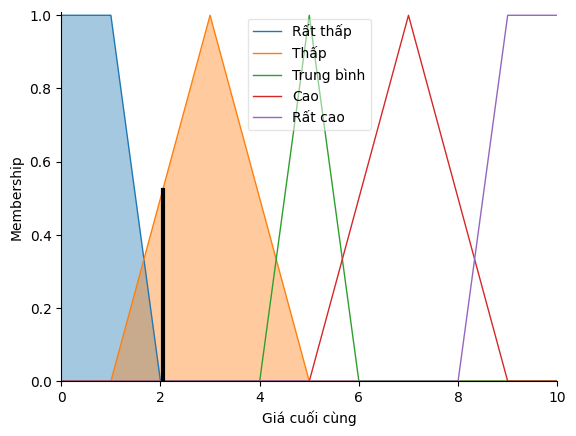

In [ ]:
#2.3
demand = ctrl.Antecedent(np.arange(0, 11, 1), 'Mức độ nhu cầu')
competitor_price = ctrl.Antecedent(np.arange(0, 11, 1), 'Giá của đối thủ')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'Chi phí sản xuất')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'Tính theo mùa')
stock_level = ctrl.Antecedent(np.arange(0, 11, 1), 'Mức tồn kho')

final_price = ctrl.Consequent(np.arange(0, 11, 1), 'Giá cuối cùng')

demand['Thấp'] = fuzz.trapmf(demand.universe, [0, 0, 2, 4])
demand['Trung bình'] = fuzz.trimf(demand.universe, [3, 5, 7])
demand['Cao'] = fuzz.trapmf(demand.universe, [6, 8, 10, 10])

competitor_price['Thấp'] = fuzz.trapmf(competitor_price.universe, [0, 0, 2, 4])
competitor_price['Trung bình'] = fuzz.trimf(competitor_price.universe, [3, 5, 7])
competitor_price['Cao'] = fuzz.trapmf(competitor_price.universe, [6, 8, 10, 10])

production_cost['Thấp'] = fuzz.trapmf(production_cost.universe, [0, 0, 2, 4])
production_cost['Trung bình'] = fuzz.trimf(production_cost.universe, [3, 5, 7])
production_cost['Cao'] = fuzz.trapmf(production_cost.universe, [6, 8, 10, 10])

seasonality['Ngoài cao điểm'] = fuzz.trapmf(seasonality.universe, [0, 0, 2, 4])
seasonality['Bình thường'] = fuzz.trimf(seasonality.universe, [3, 5, 7])
seasonality['Cao điểm'] = fuzz.trapmf(seasonality.universe, [6, 8, 10, 10])

stock_level['Thấp'] = fuzz.trapmf(stock_level.universe, [0, 0, 2, 4])
stock_level['Trung bình'] = fuzz.trimf(stock_level.universe, [3, 5, 7])
stock_level['Cao'] = fuzz.trapmf(stock_level.universe, [6, 8, 10, 10])
stock_level['Rất cao'] = fuzz.trapmf(stock_level.universe, [8, 9, 10, 10])

final_price['Rất thấp'] = fuzz.trapmf(final_price.universe, [0, 0, 1, 2])
final_price['Thấp'] = fuzz.trimf(final_price.universe, [1, 3, 5])
final_price['Trung bình'] = fuzz.trimf(final_price.universe, [4, 5, 6])
final_price['Cao'] = fuzz.trimf(final_price.universe, [5, 7, 9])
final_price['Rất cao'] = fuzz.trapmf(final_price.universe, [8, 9, 10, 10])

rule1 = ctrl.Rule(demand['Cao'] & competitor_price['Cao'] & stock_level['Thấp'], final_price['Rất cao'])
rule2 = ctrl.Rule(demand['Cao'] & seasonality['Cao điểm'] & stock_level['Thấp'], final_price['Rất cao'])
rule3 = ctrl.Rule(demand['Trung bình'] & production_cost['Cao'] & stock_level['Thấp'], final_price['Rất cao'])
rule4 = ctrl.Rule(demand['Cao'] & competitor_price['Trung bình'] & stock_level['Trung bình'], final_price['Cao'])
rule5 = ctrl.Rule(demand['Trung bình'] & competitor_price['Cao'] & stock_level['Thấp'], final_price['Cao'])
rule6 = ctrl.Rule(demand['Cao'] & seasonality['Cao điểm'] & stock_level['Trung bình'], final_price['Cao'])
rule7 = ctrl.Rule(demand['Trung bình'] & competitor_price['Trung bình'] & stock_level['Trung bình'], final_price['Trung bình'])
rule8 = ctrl.Rule(demand['Thấp'] & competitor_price['Cao'] & stock_level['Trung bình'], final_price['Trung bình'])
rule9 = ctrl.Rule(demand['Trung bình'] & production_cost['Trung bình'] & stock_level['Trung bình'], final_price['Trung bình'])
rule10 = ctrl.Rule(demand['Thấp'] & competitor_price['Thấp'] & stock_level['Cao'], final_price['Thấp'])
rule11 = ctrl.Rule(demand['Trung bình'] & production_cost['Thấp'] & stock_level['Cao'], final_price['Thấp'])
rule12 = ctrl.Rule(demand['Thấp'] & seasonality['Ngoài cao điểm'] & stock_level['Cao'], final_price['Thấp'])
rule13 = ctrl.Rule(demand['Thấp'] & competitor_price['Thấp'] & stock_level['Rất cao'], final_price['Rất thấp'])
rule14 = ctrl.Rule(demand['Thấp'] & seasonality['Ngoài cao điểm'] & stock_level['Rất cao'], final_price['Rất thấp'])
rule15 = ctrl.Rule(demand['Trung bình'] & competitor_price['Thấp'] & stock_level['Rất cao'], final_price['Rất thấp'])


pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
pricing_system = ctrl.ControlSystemSimulation(pricing_ctrl)
pricing_system.input['Mức độ nhu cầu'] = 2
pricing_system.input['Giá của đối thủ'] = 2
pricing_system.input['Chi phí sản xuất'] = 3
pricing_system.input['Tính theo mùa'] = 2
pricing_system.input['Mức tồn kho'] = 9
pricing_system.compute()
print('gia cuoi cung',pricing_system.output['Giá cuối cùng'])
final_price.view(sim=pricing_system)



thoi gian giat: 32.04913678618856
muc nuoc: 4.0780410742496045


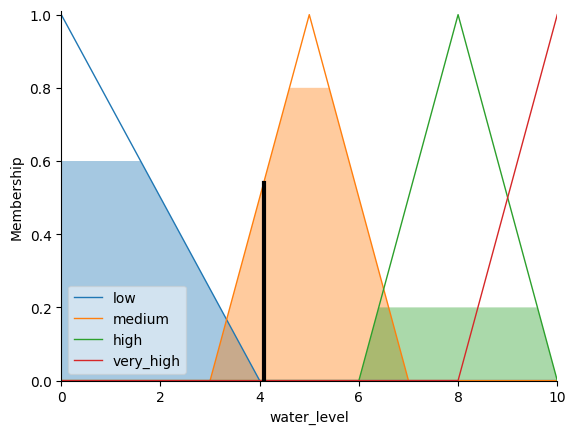

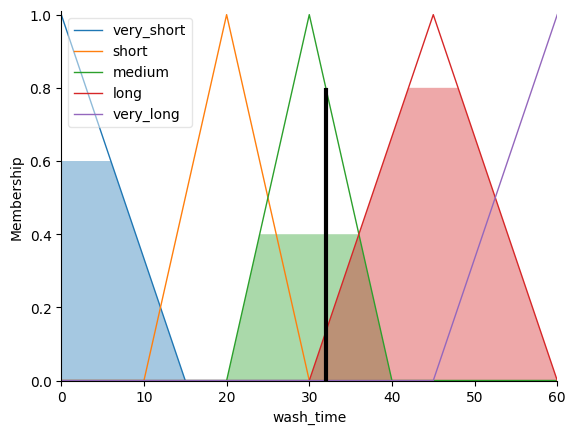

In [ ]:
#2.4
load = ctrl.Antecedent(np.arange(0, 11, 1), 'load')
dirt = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt')
fabric = ctrl.Antecedent(np.arange(0, 11, 1), 'fabric')
wash_time = ctrl.Consequent(np.arange(0, 61, 1), 'wash_time')
water_level = ctrl.Consequent(np.arange(0, 11, 1), 'water_level')
load['small'] = fuzz.trimf(load.universe, [0, 0, 5])
load['medium'] = fuzz.trimf(load.universe, [0, 5, 10])
load['large'] = fuzz.trimf(load.universe, [5, 10, 10])

dirt['low'] = fuzz.trimf(dirt.universe, [0, 0, 5])
dirt['medium'] = fuzz.trimf(dirt.universe, [0, 5, 10])
dirt['high'] = fuzz.trimf(dirt.universe, [5, 10, 10])

fabric['delicate'] = fuzz.trimf(fabric.universe, [0, 0, 5])
fabric['normal'] = fuzz.trimf(fabric.universe, [0, 5, 10])
fabric['heavy'] = fuzz.trimf(fabric.universe, [5, 10, 10])

wash_time['very_short'] = fuzz.trimf(wash_time.universe, [0, 0, 15])
wash_time['short'] = fuzz.trimf(wash_time.universe, [10, 20, 30])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [20, 30, 40])
wash_time['long'] = fuzz.trimf(wash_time.universe, [30, 45, 60])
wash_time['very_long'] = fuzz.trimf(wash_time.universe, [45, 60, 60])

water_level['low'] = fuzz.trimf(water_level.universe, [0, 0, 4])
water_level['medium'] = fuzz.trimf(water_level.universe, [3, 5, 7])
water_level['high'] = fuzz.trimf(water_level.universe, [6, 8, 10])
water_level['very_high'] = fuzz.trimf(water_level.universe, [8, 10, 10])

rules = [
    ctrl.Rule(load['small'] & dirt['low'], [wash_time['short'], water_level['low']]),
    ctrl.Rule(load['small'] & dirt['medium'], [wash_time['medium'], water_level['medium']]),
    ctrl.Rule(load['small'] & dirt['high'], [wash_time['long'], water_level['medium']]),
    ctrl.Rule(load['medium'] & dirt['low'], [wash_time['medium'], water_level['medium']]),
    ctrl.Rule(load['medium'] & dirt['medium'], [wash_time['long'], water_level['medium']]),
    ctrl.Rule(load['medium'] & dirt['high'], [wash_time['long'], water_level['high']]),
    ctrl.Rule(load['large'] & dirt['low'], [wash_time['medium'], water_level['high']]),
    ctrl.Rule(load['large'] & dirt['medium'], [wash_time['long'], water_level['high']]),
    ctrl.Rule(load['large'] & dirt['high'], [wash_time['long'], water_level['high']]),

    ctrl.Rule(fabric['delicate'], [wash_time['very_short'], water_level['low']]),
    ctrl.Rule(fabric['normal'], [wash_time['medium'], water_level['medium']]),
    ctrl.Rule(fabric['heavy'], [wash_time['long'], water_level['high']]),

    ctrl.Rule(load['large'] & dirt['high'] & fabric['heavy'],
             [wash_time['very_long'], water_level['very_high']]),
    ctrl.Rule(load['small'] & dirt['low'] & fabric['delicate'],
             [wash_time['very_short'], water_level['low']]),
    ctrl.Rule(load['medium'] & dirt['medium'] & fabric['normal'],
             [wash_time['medium'], water_level['medium']])
]
washing_ctrl = ctrl.ControlSystem(rules)
washing_machine = ctrl.ControlSystemSimulation(washing_ctrl)
washing_machine.input['load'] = 5
washing_machine.input['dirt'] = 6
washing_machine.input['fabric'] = 2
washing_machine.compute()
print('thoi gian giat:',washing_machine.output['wash_time'] )
print('muc nuoc:',washing_machine.output['water_level'] )
water_level.view(sim=washing_machine)
wash_time.view(sim=washing_machine)


toc do quat: 83.33333333333336
muc do lam mat: 68.99841834717279


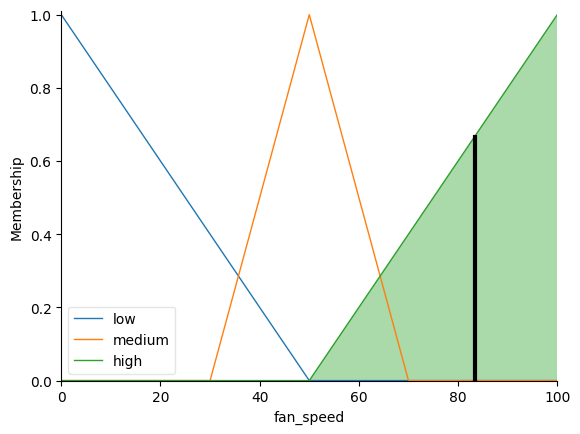

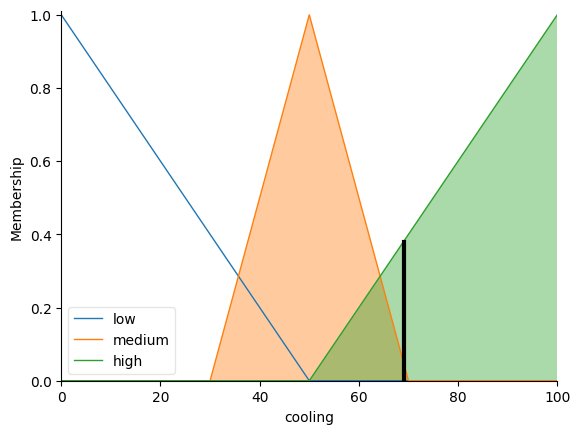

In [ ]:
#2.5

temperature = ctrl.Antecedent(np.arange(15, 36, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
people = ctrl.Antecedent(np.arange(0, 11, 1), 'people')

fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')
cooling = ctrl.Consequent(np.arange(0, 101, 1), 'cooling')

temperature['cold'] = fuzz.trimf(temperature.universe, [15, 15, 22])
temperature['cool'] = fuzz.trimf(temperature.universe, [18, 22, 25])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [22, 25, 28])
temperature['warm'] = fuzz.trimf(temperature.universe, [25, 28, 32])
temperature['hot'] = fuzz.trimf(temperature.universe, [28, 35, 35])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

people['few'] = fuzz.trimf(people.universe, [0, 0, 4])
people['moderate'] = fuzz.trimf(people.universe, [2, 5, 8])
people['many'] = fuzz.trimf(people.universe, [6, 10, 10])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

cooling['low'] = fuzz.trimf(cooling.universe, [0, 0, 50])
cooling['medium'] = fuzz.trimf(cooling.universe, [30, 50, 70])
cooling['high'] = fuzz.trimf(cooling.universe, [50, 100, 100])

rules = [
    ctrl.Rule(temperature['cold'], fan_speed['low']),
    ctrl.Rule(temperature['cool'], fan_speed['low']),
    ctrl.Rule(temperature['comfortable'], fan_speed['medium']),
    ctrl.Rule(temperature['warm'], fan_speed['high']),
    ctrl.Rule(temperature['hot'], fan_speed['high']),

    ctrl.Rule(temperature['cold'], cooling['low']),
    ctrl.Rule(temperature['cool'], cooling['low']),
    ctrl.Rule(temperature['comfortable'], cooling['medium']),
    ctrl.Rule(temperature['warm'], cooling['high']),
    ctrl.Rule(temperature['hot'], cooling['high']),

    ctrl.Rule(humidity['low'], cooling['low']),
    ctrl.Rule(humidity['medium'], cooling['medium']),
    ctrl.Rule(humidity['high'], cooling['high']),

    ctrl.Rule(people['few'], fan_speed['low']),
    ctrl.Rule(people['moderate'], fan_speed['medium']),
    ctrl.Rule(people['many'], fan_speed['high']),

    ctrl.Rule(temperature['hot'] & humidity['high'] & people['many'],
             [fan_speed['high'], cooling['high']]),
    ctrl.Rule(temperature['comfortable'] & humidity['medium'] & people['moderate'],
             [fan_speed['medium'], cooling['medium']]),
    ctrl.Rule(temperature['cool'] & humidity['low'] & people['few'],
             [fan_speed['low'], cooling['low']])
]
maylanh_ctrl=ctrl.ControlSystem(rules)
maylanh_system=ctrl.ControlSystemSimulation(maylanh_ctrl)
maylanh_system.input['temperature']=35
maylanh_system.input['humidity']=50
maylanh_system.input['people']=10
maylanh_system.compute()
print('toc do quat:',maylanh_system.output['fan_speed'])
print('muc do lam mat:',maylanh_system.output['cooling'])
fan_speed.view(sim=maylanh_system)
cooling.view(sim=maylanh_system)

thoi gian nay: 14.999999999999998
cong suat: 86.66666666666664


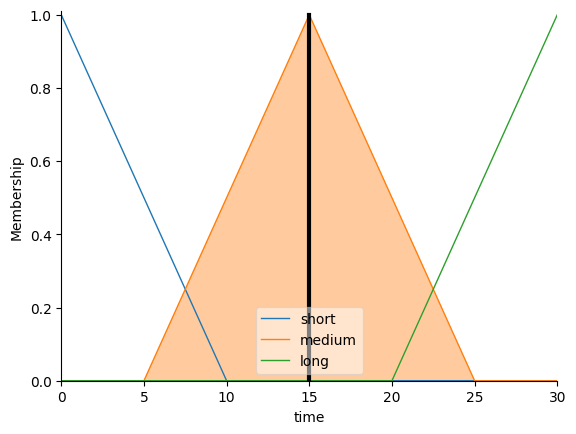

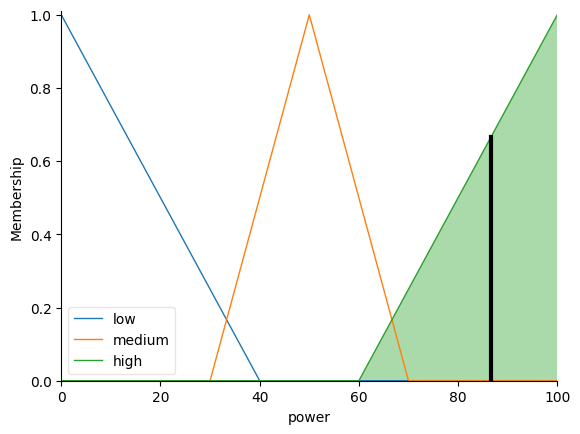

In [30]:
#2.6
weight = ctrl.Antecedent(np.arange(0, 1001, 1), 'weight')
food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
temp = ctrl.Antecedent(np.arange(0, 61, 1), 'temp')
time = ctrl.Consequent(np.arange(0, 31, 1), 'time')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

weight['light'] = fuzz.trimf(weight.universe, [0, 0, 400])
weight['medium'] = fuzz.trimf(weight.universe, [200, 500, 800])
weight['heavy'] = fuzz.trimf(weight.universe, [600, 1000, 1000])

food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 4])
food_type['medium'] = fuzz.trimf(food_type.universe, [3, 5, 7])
food_type['hard'] = fuzz.trimf(food_type.universe, [6, 10, 10])

temp['cold'] = fuzz.trimf(temp.universe, [0, 0, 15])
temp['warm'] = fuzz.trimf(temp.universe, [10, 25, 40])
temp['hot'] = fuzz.trimf(temp.universe, [35, 60, 60])

time['short'] = fuzz.trimf(time.universe, [0, 0, 10])
time['medium'] = fuzz.trimf(time.universe, [5, 15, 25])
time['long'] = fuzz.trimf(time.universe, [20, 30, 30])

power['low'] = fuzz.trimf(power.universe, [0, 0, 40])
power['medium'] = fuzz.trimf(power.universe, [30, 50, 70])
power['high'] = fuzz.trimf(power.universe, [60, 100, 100])

rules = [
    ctrl.Rule(weight['light'], time['short']),
    ctrl.Rule(weight['medium'], time['medium']),
    ctrl.Rule(weight['heavy'], time['long']),

    ctrl.Rule(food_type['soft'], power['low']),
    ctrl.Rule(food_type['medium'], power['medium']),
    ctrl.Rule(food_type['hard'], power['high']),

    ctrl.Rule(temp['cold'], time['long']),
    ctrl.Rule(temp['warm'], time['medium']),
    ctrl.Rule(temp['hot'], time['short']),

    ctrl.Rule(weight['heavy'] & food_type['hard'] & temp['cold'],
             [time['long'], power['high']]),
    ctrl.Rule(weight['medium'] & food_type['soft'] & temp['warm'],
             [time['medium'], power['low']]),
    ctrl.Rule(weight['light'] & food_type['medium'] & temp['hot'],
             [time['short'], power['medium']])
]
system_ctrl = ctrl.ControlSystem(rules)
system=ctrl.ControlSystemSimulation(system_ctrl)
system.input['weight']= 500
system.input['food_type']=10
system.input['temp']=30
system.compute()
print('thoi gian nay:',system.output['time'])
print('cong suat:',system.output['power'])
time.view(sim=system)
power.view(sim=system)

lieu dung: 49.99999999999996
dieu chinh dich: 20.248538011695906
lieu phap oxy: 49.999999999999986


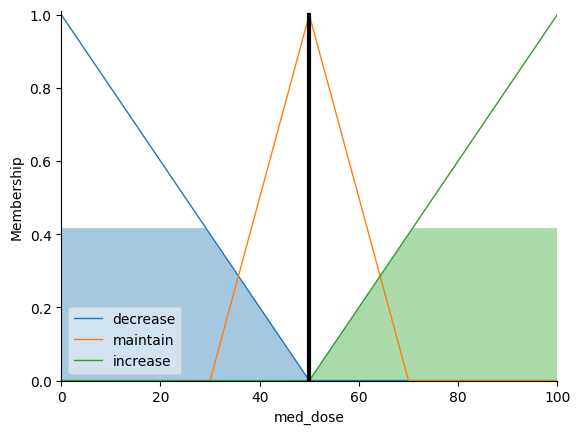

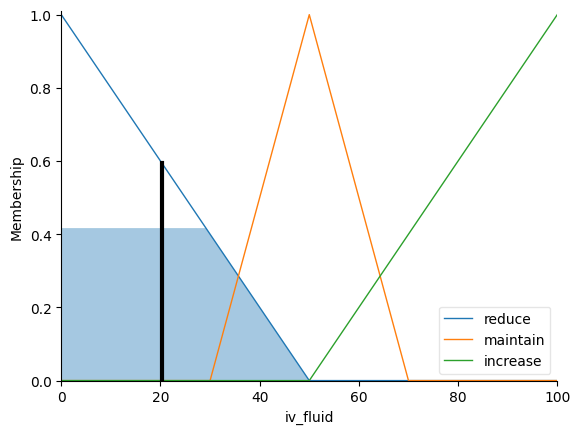

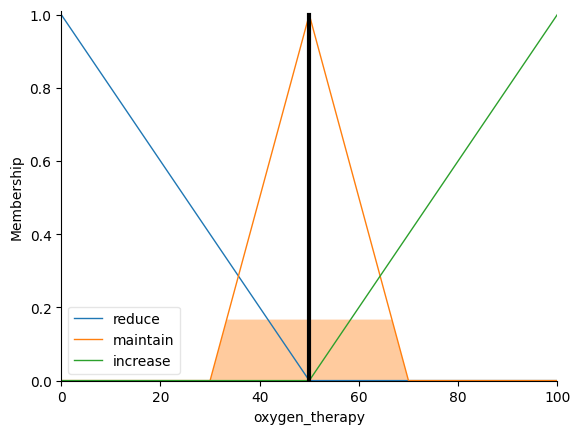

In [32]:
#2.8
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

heart_rate = ctrl.Antecedent(np.arange(40, 161, 1), 'heart_rate')
blood_pressure_sys = ctrl.Antecedent(np.arange(70, 191, 1), 'blood_pressure_sys')
blood_pressure_dia = ctrl.Antecedent(np.arange(40, 121, 1), 'blood_pressure_dia')
body_temp = ctrl.Antecedent(np.arange(35, 41, 0.1), 'body_temp')
oxygen_sat = ctrl.Antecedent(np.arange(70, 101, 1), 'oxygen_sat')
blood_sugar = ctrl.Antecedent(np.arange(50, 251, 1), 'blood_sugar')

med_dose = ctrl.Consequent(np.arange(0, 101, 1), 'med_dose')
iv_fluid = ctrl.Consequent(np.arange(0, 101, 1), 'iv_fluid')
oxygen_therapy = ctrl.Consequent(np.arange(0, 101, 1), 'oxygen_therapy')

heart_rate['low'] = fuzz.trimf(heart_rate.universe, [40, 40, 60])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [50, 80, 110])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [90, 160, 160])

blood_pressure_sys['low'] = fuzz.trimf(blood_pressure_sys.universe, [70, 70, 90])
blood_pressure_sys['normal'] = fuzz.trimf(blood_pressure_sys.universe, [80, 110, 130])
blood_pressure_sys['high'] = fuzz.trimf(blood_pressure_sys.universe, [120, 190, 190])

blood_pressure_dia['low'] = fuzz.trimf(blood_pressure_dia.universe, [40, 40, 60])
blood_pressure_dia['normal'] = fuzz.trimf(blood_pressure_dia.universe, [50, 75, 90])
blood_pressure_dia['high'] = fuzz.trimf(blood_pressure_dia.universe, [80, 120, 120])

body_temp['low'] = fuzz.trimf(body_temp.universe, [35, 35, 36])
body_temp['normal'] = fuzz.trimf(body_temp.universe, [35.5, 36.5, 37.5])
body_temp['high'] = fuzz.trimf(body_temp.universe, [37, 40, 40])

oxygen_sat['low'] = fuzz.trimf(oxygen_sat.universe, [70, 70, 90])
oxygen_sat['normal'] = fuzz.trimf(oxygen_sat.universe, [85, 95, 100])

blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [50, 50, 70])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [60, 105, 140])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [130, 250, 250])

med_dose['decrease'] = fuzz.trimf(med_dose.universe, [0, 0, 50])
med_dose['maintain'] = fuzz.trimf(med_dose.universe, [30, 50, 70])
med_dose['increase'] = fuzz.trimf(med_dose.universe, [50, 100, 100])

iv_fluid['reduce'] = fuzz.trimf(iv_fluid.universe, [0, 0, 50])
iv_fluid['maintain'] = fuzz.trimf(iv_fluid.universe, [30, 50, 70])
iv_fluid['increase'] = fuzz.trimf(iv_fluid.universe, [50, 100, 100])

oxygen_therapy['reduce'] = fuzz.trimf(oxygen_therapy.universe, [0, 0, 50])
oxygen_therapy['maintain'] = fuzz.trimf(oxygen_therapy.universe, [30, 50, 70])
oxygen_therapy['increase'] = fuzz.trimf(oxygen_therapy.universe, [50, 100, 100])

rules = [
    ctrl.Rule(heart_rate['low'] & blood_pressure_sys['low'] & blood_pressure_dia['low'],
             [med_dose['increase'], iv_fluid['increase']]),
    ctrl.Rule(heart_rate['high'] & blood_pressure_sys['high'] & blood_pressure_dia['high'],
             [med_dose['decrease'], iv_fluid['reduce']]),
    ctrl.Rule(heart_rate['normal'] & blood_pressure_sys['normal'] & blood_pressure_dia['normal'],
             [med_dose['maintain'], iv_fluid['maintain']]),

    ctrl.Rule(body_temp['high'] & oxygen_sat['low'],
             [oxygen_therapy['increase'], med_dose['increase']]),
    ctrl.Rule(body_temp['normal'] & oxygen_sat['normal'],
             [oxygen_therapy['maintain'], med_dose['maintain']]),
    ctrl.Rule(body_temp['low'] & oxygen_sat['low'],
             [oxygen_therapy['increase'], iv_fluid['increase']]),

    ctrl.Rule(blood_sugar['high'], med_dose['increase']),
    ctrl.Rule(blood_sugar['low'], [med_dose['decrease'], iv_fluid['increase']]),
    ctrl.Rule(blood_sugar['normal'], med_dose['maintain']),

    ctrl.Rule(blood_pressure_sys['high'] & blood_sugar['high'] & heart_rate['high'],
             [med_dose['decrease'], iv_fluid['reduce']]),
    ctrl.Rule(blood_pressure_sys['low'] & oxygen_sat['low'] & heart_rate['low'],
             [iv_fluid['increase'], oxygen_therapy['increase'], med_dose['increase']]),
    ctrl.Rule(body_temp['high'] & blood_pressure_sys['high'] & oxygen_sat['normal'],
             [med_dose['increase'], oxygen_therapy['maintain']])
]
patient_ctrl = ctrl.ControlSystem(rules)
patient_monitor = ctrl.ControlSystemSimulation(patient_ctrl)
patient_monitor.input['heart_rate']=120
patient_monitor.input['blood_pressure_sys']=150
patient_monitor.input['blood_pressure_dia']=95
patient_monitor.input['body_temp']=37.5
patient_monitor.input['oxygen_sat']=94
patient_monitor.input['blood_sugar']=180
patient_monitor.compute()
print('lieu dung:',patient_monitor.output['med_dose'])
print('dieu chinh dich:',patient_monitor.output['iv_fluid'])
print('lieu phap oxy:',patient_monitor.output['oxygen_therapy'])
med_dose.view(sim=patient_monitor)
iv_fluid.view(sim=patient_monitor)
oxygen_therapy.view(sim=patient_monitor)


danh gia: 8.444444444444445


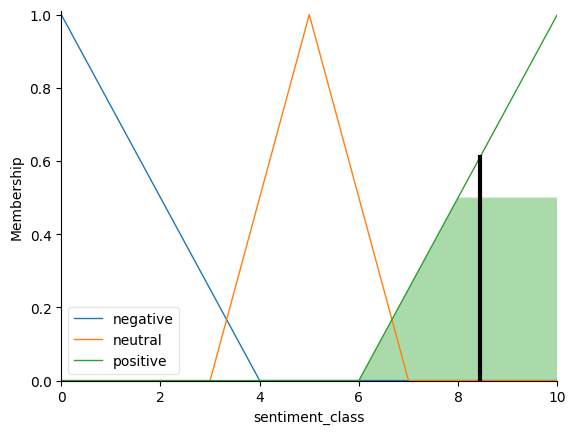

In [39]:
#2.9
sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 11, 1), 'emotion_intensity')
positive_words = ctrl.Antecedent(np.arange(0, 11, 1), 'positive_words')
negative_words = ctrl.Antecedent(np.arange(0, 11, 1), 'negative_words')
sentiment_class = ctrl.Consequent(np.arange(0, 11, 1), 'sentiment_class')

sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [0, 0, 0.3])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [0.2, 0.5, 0.8])
sentiment_score['positive'] = fuzz.trimf(sentiment_score.universe, [0.7, 1, 1])

emotion_intensity['low'] = fuzz.trimf(emotion_intensity.universe, [0, 0, 4])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [3, 5, 7])
emotion_intensity['high'] = fuzz.trimf(emotion_intensity.universe, [6, 10, 10])

positive_words['few'] = fuzz.trimf(positive_words.universe, [0, 0, 2])
positive_words['some'] = fuzz.trimf(positive_words.universe, [1, 3, 5])
positive_words['many'] = fuzz.trimf(positive_words.universe, [4, 10, 10])

negative_words['few'] = fuzz.trimf(negative_words.universe, [0, 0, 2])
negative_words['some'] = fuzz.trimf(negative_words.universe, [1, 3, 5])
negative_words['many'] = fuzz.trimf(negative_words.universe, [4, 10, 10])

sentiment_class['negative'] = fuzz.trimf(sentiment_class.universe, [0, 0, 4])
sentiment_class['neutral'] = fuzz.trimf(sentiment_class.universe, [3, 5, 7])
sentiment_class['positive'] = fuzz.trimf(sentiment_class.universe, [6, 10, 10])

rules = [
    ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], sentiment_class['negative']),
    ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], sentiment_class['neutral']),
    ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], sentiment_class['neutral']),
    ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], sentiment_class['positive']),

    ctrl.Rule(positive_words['many'] & negative_words['few'], sentiment_class['positive']),
    ctrl.Rule(positive_words['few'] & negative_words['many'], sentiment_class['negative']),
    ctrl.Rule(positive_words['some'] & negative_words['some'], sentiment_class['neutral']),

    ctrl.Rule(sentiment_score['negative'] & negative_words['many'] & emotion_intensity['high'], sentiment_class['negative']),
    ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'] & positive_words['some'], sentiment_class['neutral']),
    ctrl.Rule(sentiment_score['positive'] & positive_words['many'] & emotion_intensity['high'], sentiment_class['positive'])
]
feedback_ctrl = ctrl.ControlSystem(rules)
feedback_analyzer = ctrl.ControlSystemSimulation(feedback_ctrl)
feedback_analyzer.input['sentiment_score']=0.9
feedback_analyzer.input['emotion_intensity']=8
feedback_analyzer.input['positive_words']=7
feedback_analyzer.input['negative_words']=1
feedback_analyzer.compute()
print('danh gia:', feedback_analyzer.output['sentiment_class'])
sentiment_class.view(sim=feedback_analyzer)